In [70]:
import pandas as pd
import requests
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [71]:
def download(url,file):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file,'wb') as f:
            f.write(response.content)

In [72]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv'
file = 'Practice.csv'
download(url,file)

In [73]:
df = pd.read_csv('Practice.csv')

In [74]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [76]:
print('Number of Duplicates:', df.duplicated().sum())

Number of Duplicates: 0


In [77]:
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Missing Values: 9


In [78]:
for col in (df.isnull()).columns.tolist():
    print (col)
    print((df.isnull())[col].value_counts())
    print('')

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



In [79]:
df.drop(columns={'Unnamed: 0'}, axis=1, inplace=True)

In [80]:
# So we have screen_size and weight:
# Replace weight with mean and screen size with most frequent
average_weight = df['Weight_kg'].astype('float').mean(axis=0)
df['Weight_kg'] = df['Weight_kg'].replace(np.nan, average_weight)

frequent_size = df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm'] = df['Screen_Size_cm'].replace(np.nan, frequent_size)

In [81]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,37.309185,2.360084,7.882353,245.781513,1.862232,1462.344538
std,0.776533,0.638282,0.235790,1.241787,2.961753,0.411393,2.482603,34.765316,0.489090,574.607699
min,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000
50%,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000
75%,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [82]:
# Standardizing the Data:
# 1 inch = 2.54 cm
# 1 kg   = 2.205 pounds
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df['Weight_kg'] = df['Weight_kg'] * 2.205

df.rename(columns={'Screen_Size_cm': 'Screen_Size', 'Weight_kg':'Weight'}, inplace=True)

In [83]:
# Normalizing the 'CPU_frequency' with its max value:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [84]:
df['CPU_frequency'] = df['CPU_frequency'].round(2)

In [88]:
# We need to check the price distribution so we can perform a summary for the Exectuives for Prices that is
Levels = ['Cheap','Medium-Base','Expensive']
Bins = np.linspace(min(df['Price']), max(df['Price']), 4)
df['Price_binned'] = pd.cut(df['Price'], Bins, labels = Levels, include_lowest = False)

Text(0.5, 1.0, 'The Distribution of Prices')

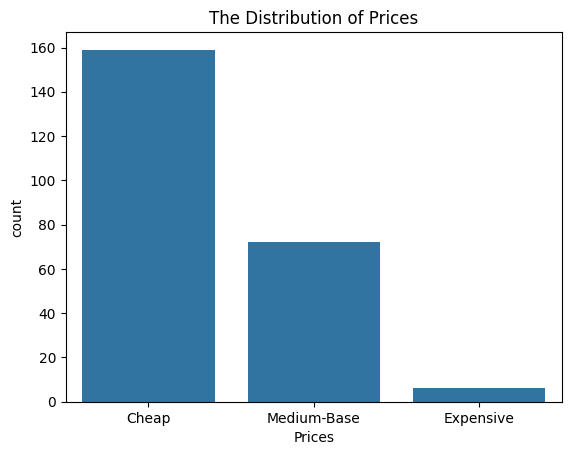

In [102]:
# Checkning the distribution Level:
sns.barplot(df['Price_binned'].value_counts(), label = Levels)
plt.xlabel('Prices')
plt.title('The Distribution of Prices')

Text(0.5, 1.0, 'The Distribution of Prices')

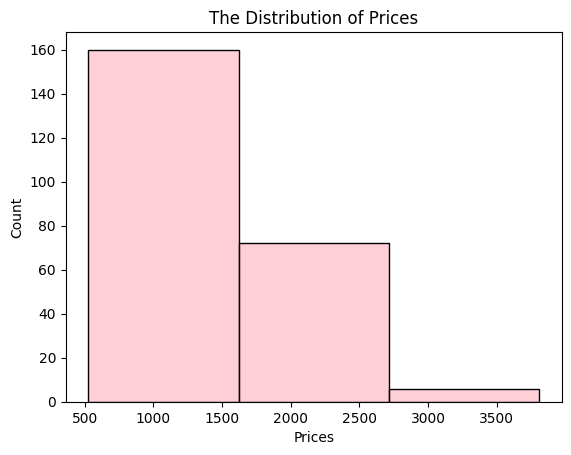

In [113]:
# Plotting it:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(df['Price'], label= Levels, bins=3, color='pink')
plt.xlabel('Prices')
plt.title('The Distribution of Prices')

In [105]:
# Creating Indicator Variables for Screen:
df['Screen'].unique()

array(['IPS Panel', 'Full HD'], dtype=object)

In [108]:
dummy = pd.get_dummies(df['Screen'], dtype = 'int')

df = pd.concat([df, dummy], axis = 1)

In [110]:
df.drop(['Screen'], axis=1, inplace=True)

In [112]:
df.head(1)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight,Price,Price_binned,Full HD,IPS Panel
0,Acer,4,2,1,5,14.0,0.55,8,256,3.528,978,Cheap,0,1


In [115]:
# Now testing the variables: "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price"
df[['CPU_frequency','Price', 'Screen_Size','Weight']].corr()

,CPU_frequency,Price,Screen_Size,Weight
CPU_frequency,1.000000,0.370052,0.000506,0.068284
Price,0.370052,1.000000,-0.110644,-0.050312
Screen_Size,0.000506,-0.110644,1.000000,0.797534
Weight,0.068284,-0.050312,0.797534,1.000000


<Axes: xlabel='CPU_frequency', ylabel='Price'>

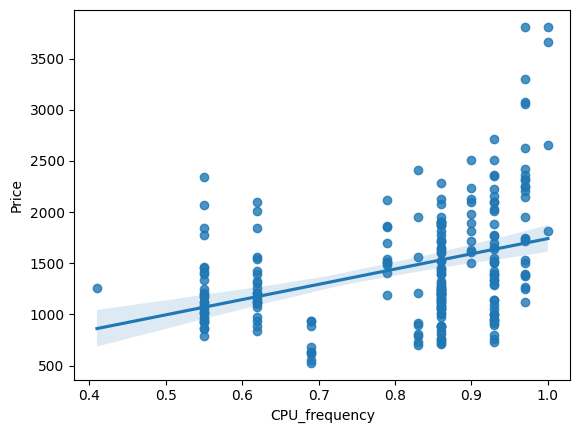

In [119]:
sns.regplot(data=df, x='CPU_frequency',y='Price')

<Axes: xlabel='Weight', ylabel='Price'>

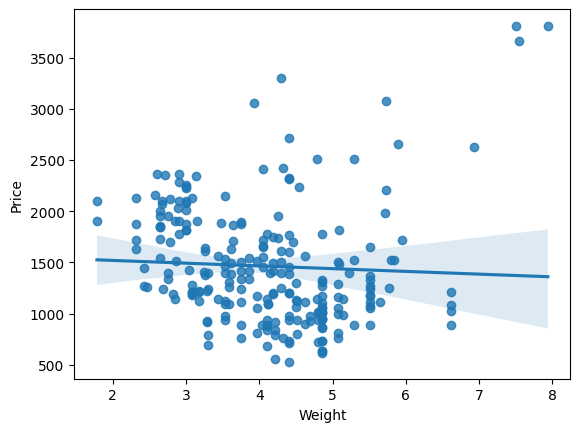

In [120]:
sns.regplot(data=df, x='Weight',y='Price')

<Axes: xlabel='Screen_Size', ylabel='Price'>

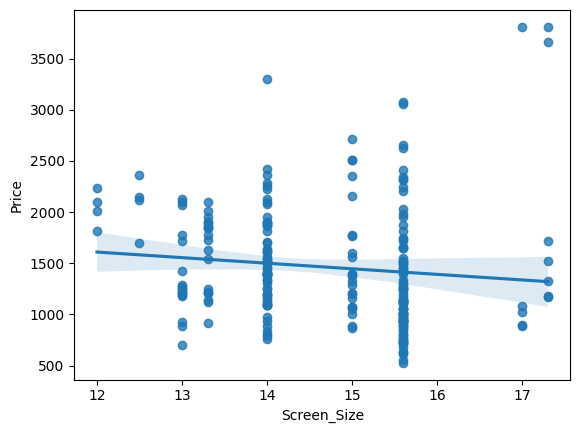

In [121]:
sns.regplot(data=df, x='Screen_Size',y='Price')

In [ ]:
'''
It seems that the CPU_frequency has the highest correlation of them all with a 37%
'''

<Axes: xlabel='Category', ylabel='Price'>

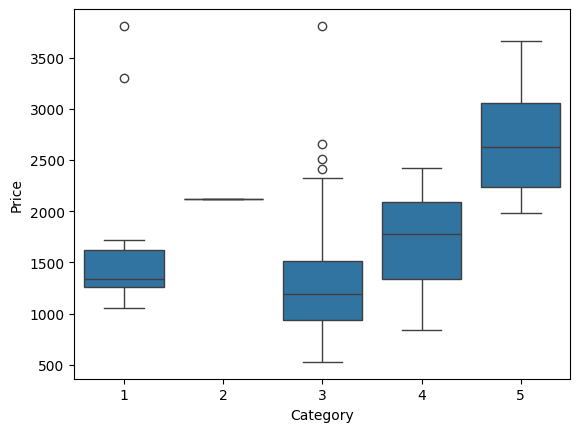

In [122]:
# Now some boxplot infos "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"
sns.boxplot(data=df, x='Category',y='Price')

<Axes: xlabel='GPU', ylabel='Price'>

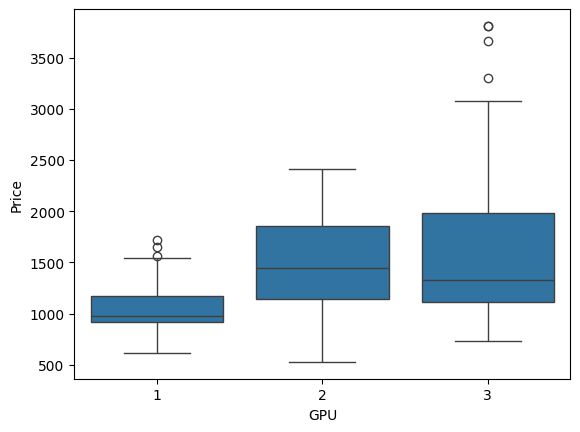

In [123]:
sns.boxplot(data=df, x='GPU',y='Price')

<Axes: xlabel='OS', ylabel='Price'>

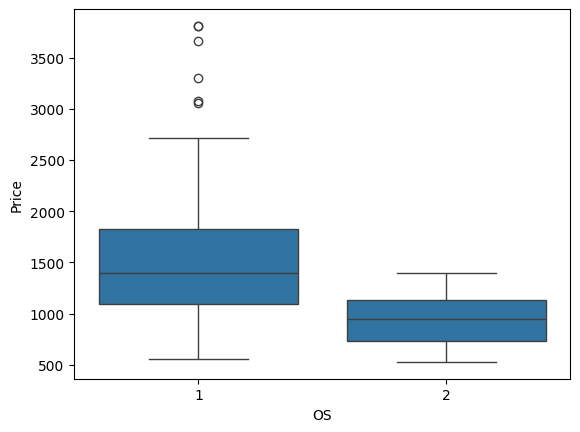

In [124]:
sns.boxplot(data=df, x='OS',y='Price')

<Axes: xlabel='CPU_core', ylabel='Price'>

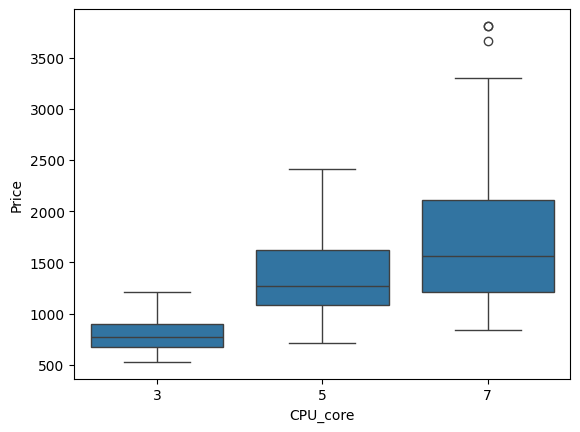

In [125]:
sns.boxplot(data=df, x='CPU_core',y='Price')

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

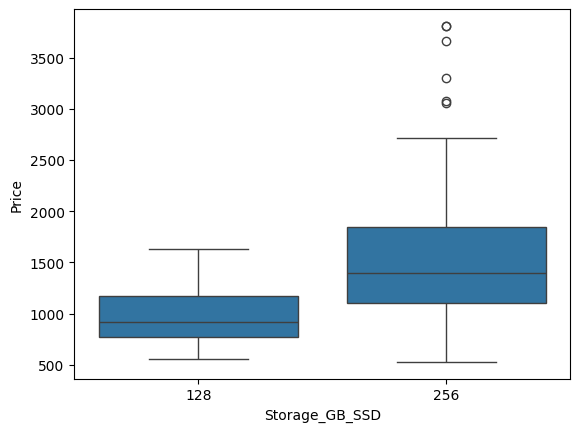

In [127]:
sns.boxplot(data=df, x='Storage_GB_SSD',y='Price')

<Axes: xlabel='RAM_GB', ylabel='Price'>

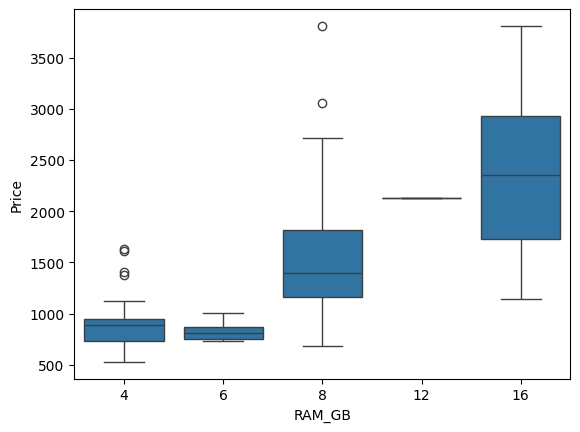

In [128]:
sns.boxplot(data=df, x='RAM_GB',y='Price')

In [129]:
# We need to see a connection with the 'GPU', 'CPU_core', 'Price with a heatmap to see what's affecting the Price
groups = df[['GPU','CPU_core','Price']]
groups.groupby(['GPU'], as_index=False)['Price'].mean()

,GPU,Price
0,1,1058.000000
1,2,1474.308824
2,3,1632.144928


In [134]:
main = groups.groupby(['GPU','CPU_core'], as_index = False)['Price'].mean()
pivot = main.pivot_table(columns='CPU_core', index='GPU')
pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

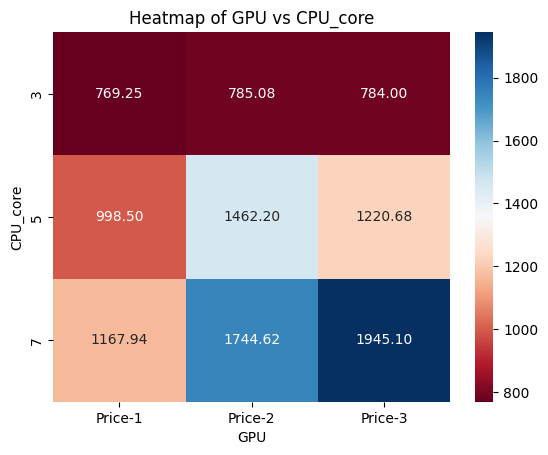

In [156]:
# Plotting the heatmap:
sns.heatmap(data=pivot, cmap="RdBu", annot=True, fmt=".2f")
plt.title('Heatmap of GPU vs CPU_core') 
plt.xlabel('GPU')
plt.ylabel('CPU_core')
plt.show()

In [155]:
# Now we need the p value and coefficient for the variables we just used:
# 'RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size','Weight','CPU_core','OS','GPU','Category'
import scipy
from scipy import stats

values = ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size','Weight','CPU_core','OS','GPU','Category']
for n in values:
    coef, pvalue = stats.pearsonr(df[n],df['Price'])
    print("The Pearson Correlation Coefficient for ",n," is", coef, " with a P-value of P =", pvalue)

The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857842  with a P-value of P = 3.681560628842986e-20
The Pearson Correlation Coefficient for  CPU_frequency  is 0.37005242437336433  with a P-value of P = 3.880072679521108e-09
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810294  with a P-value of P = 0.00014898923191724212
The Pearson Correlation Coefficient for  Screen_Size  is -0.11064420817118284  with a P-value of P = 0.08853397846830667
The Pearson Correlation Coefficient for  Weight  is -0.05031225837751548  with a P-value of P = 0.43976938534338944
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127009089e-14
The Pearson Correlation Coefficient for  OS  is -0.22172980114827398  with a P-value of P = 0.0005696642559246697
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  with a P-value of P = 6.166949698364264e-06
The Pearson Correlation Coefficient for  Category 

In [ ]:
'''
It seems that RAM_GB has a strong linear relationship than the rest and it has a strong rejection to null hypothesis..
'''

In [161]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

x = df[['RAM_GB']]
y = df['Price']
lr = LinearRegression()
lr.fit(x,y)
ypredict = lr.predict(x)

In [162]:
print('The R squared is:', lr.score(x,y), 'and the Mean Squared Error is:', mean_squared_error(y,ypredict))

The R squared is: 0.30172752069560793 and the Mean Squared Error is: 229582.71927482332


In [165]:
# Now let's create a multiple linear regression to check the other values:(picking the lowest pvalue)
z = df[['RAM_GB','CPU_frequency','CPU_core','GPU',"Category",'OS','Storage_GB_SSD']]
y = df['Price']
lm = LinearRegression()
lm.fit(z,y)
yhat = lm.predict(z)

In [167]:
print('The R squared is:', lm.score(z,y), 'and the Mean Squared Error is:', mean_squared_error(y,yhat))

The R squared is: 0.5092551576782178 and the Mean Squared Error is: 161350.38786372586


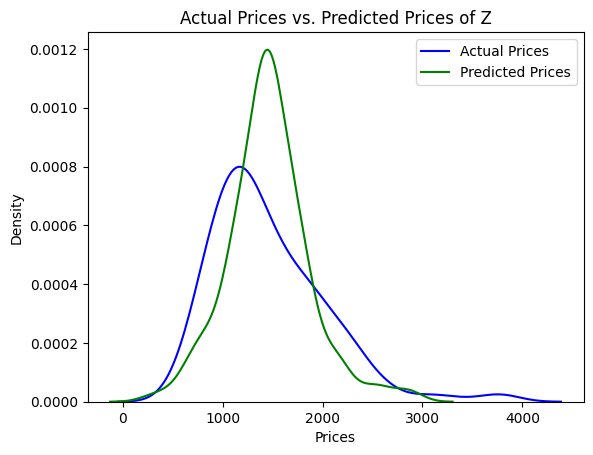

In [172]:
# Now lets plot to see Z:
sns.kdeplot(y, color='blue', label='Actual Prices')
sns.kdeplot(yhat, color='green', label='Predicted Prices')
plt.xlabel('Prices')
plt.title('Actual Prices vs. Predicted Prices of Z')
plt.legend()

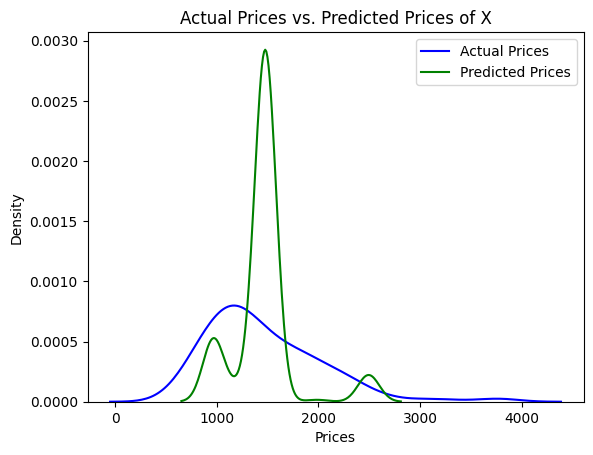

In [173]:
# Now lets plot to see X:
sns.kdeplot(y, color='blue', label='Actual Prices')
sns.kdeplot(ypredict, color='green', label='Predicted Prices')
plt.xlabel('Prices')
plt.title('Actual Prices vs. Predicted Prices of X')
plt.legend()

In [256]:
# Now for Polynomial Regression: RAM_GB
x = df['RAM_GB']

def Poly(model,inde,de,Name):
    xnew = np.linspace(inde.min(),inde.max(),100)
    ynew = model(xnew)

    plt.plot(inde,de,'.',xnew,ynew,'-')
    plt.gca()
    plt.gcf()
    plt.xlabel('Ram')
    plt.ylabel('Price')
    plt.title(Name)
    plt.show()

import ipywidgets
from ipywidgets import interact

def view(number):
    n = int(number)
    p = np.polyfit(x,y,n)
    f = np.poly1d(p)
    Poly(f,x,y,'Polynomial Regression for each order')

In [255]:
interact(view,number = (1,10,1))

interactive(children=(IntSlider(value=5, description='number', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.view(number)>

In [206]:
order = [2,3,4,5,6]
for n in order:
    p = np.polyfit(x,y,n)
    f = np.poly1d(p)
    print('The R2 score of Ram in', n,'is:', r2_score(y,f(x)), 'and the Mean Squared Error is:', mean_squared_error(y,f(x)))

The R2 score of Ram in 2 is: 0.30853197675192645 and the Mean Squared Error is: 227345.50447559214
The R2 score of Ram in 3 is: 0.31421153116195566 and the Mean Squared Error is: 225478.14240080037
The R2 score of Ram in 4 is: 0.320093877033072 and the Mean Squared Error is: 223544.10518634328
The R2 score of Ram in 5 is: 0.3200938770330719 and the Mean Squared Error is: 223544.1051863433
The R2 score of Ram in 6 is: 0.3200938770330719 and the Mean Squared Error is: 223544.1051863433


In [208]:
# To enhance our model, let us use the PipeLine feature to combine all the ML Features:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

Input = [('Scaler',StandardScaler()),('Poly',PolynomialFeatures()),('Linear',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(z,y)
yhat1 = pipe.predict(z)

In [210]:
print('The R2 score of Ram is:', r2_score(y,yhat1), 'and the Mean Squared Error is:', mean_squared_error(y,yhat1))

The R2 score of Ram is: 0.6352746109590989 and the Mean Squared Error is: 119916.86495792164


In [244]:
# We have to improve the model more using cross validation:
from sklearn.model_selection import train_test_split

# We will start with the Linear Regrssion:
datay = df['Price']
datax = df.drop(['Price'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(datax,datay,test_size=0.1,random_state=1)
xtrain.shape[0], xtrain.shape[1]

(214, 13)

In [245]:
lm = LinearRegression()
lm.fit(xtrain[['RAM_GB']],ytrain)
yhat = lm.predict(xtrain[['RAM_GB']])

In [248]:
print('R2 for Train and Test is:', lm.score(xtrain[['RAM_GB']],ytrain), lm.score(xtest[['RAM_GB']],ytest))

R2 for Train and Test is: 0.31557318424945835 0.11302549368708559


In [236]:
# Getting Cross Validation:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(lm,datax[['RAM_GB']],datay,cv=4)

In [237]:
print('The mean of folds:', cross_score.mean(), 'and the standard dev is:', cross_score.std())

The mean of folds: 0.00952622830225075 and the standard dev is: 0.3831581534199184


In [249]:
# We need to check the point of overfitting in the graph by using the Polynomial Features:
xtrain,xtest,ytrain,ytest = train_test_split(datax,datay,test_size=0.5,random_state=1)

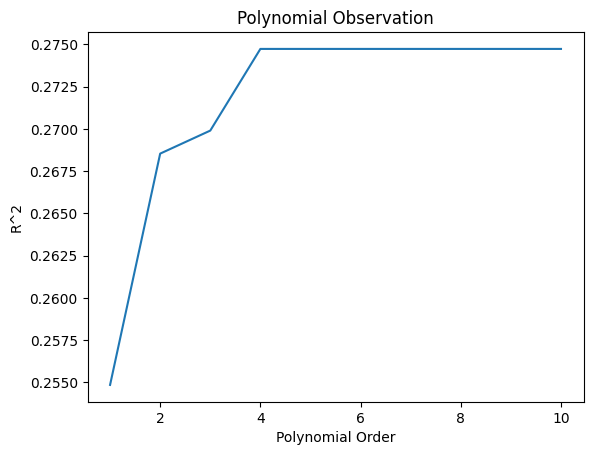

In [252]:
# We need to observe the appropriate degree value:
rsquared = []
order = [1,2,3,4,5,6,7,8,9,10]
for n in order:
    xtrain,xtest,ytrain,ytest = train_test_split(datax,datay,test_size=0.5,random_state=1)
    pf = PolynomialFeatures(degree=n)
    xtrainpf = pf.fit_transform(xtrain[['RAM_GB']],ytrain)
    xtestpf = pf.fit_transform(xtest[['RAM_GB']],ytest)
    lm = LinearRegression()
    lm.fit(xtrainpf,ytrain)
    rsquared.append(lm.score(xtrainpf,ytrain))

plt.plot(order,rsquared)
plt.xlabel('Polynomial Order')
plt.ylabel('R^2')
plt.title('Polynomial Observation')
plt.show()

In [260]:
# Now, lets test all the variables from before:
# Recalling the z values:
pf = PolynomialFeatures(degree=2)
ztrainpf = pf.fit_transform(xtrain[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], ytrain)
ztestpf =  pf.fit_transform(xtest[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], ytest)

import tqdm
from tqdm import tqdm
from sklearn.linear_model import Ridge

r2train = []
r2test = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    rmod = Ridge(alpha=alpha)
    rmod.fit(ztrainpf,ytrain)
    rmod.fit(ztestpf,ytest)
    train_score,test_score = rmod.score(ztrainpf,ytrain), rmod.score(ztestpf,ytest)
    pbar.set_postfix({'Train Results':train_score, 'Test Score':test_score})
    r2train.append(train_score)
    r2test.append(test_score)

100%|████████████████████████████████████████| 999/999 [00:05<00:00, 190.80it/s, Train Results=0.494, Test Score=0.639]


Text(0.5, 1.0, 'Regularization Parameter(Alpha)')

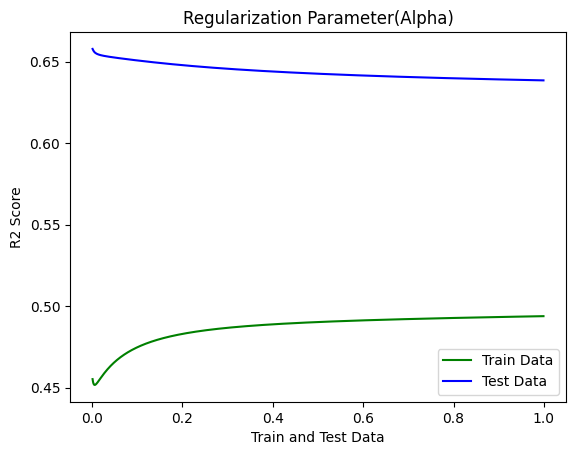

In [272]:
plt.plot(Alpha, r2train, color='green', label='Train Data')
plt.plot(Alpha, r2test, color='blue', label='Test Data')
plt.legend()
plt.xlabel('Train and Test Data')
plt.ylabel('R2 Score')
plt.title('Regularization Parameter(Alpha)')

In [266]:
# Now we use the Grid Search to find the best parameter:
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
rmodel = Ridge(alpha=parameters)
GS = GridSearchCV(rmodel, parameters, cv=4) 
GS

In [270]:
GS.fit(xtrain[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']],ytrain)
best = GS.best_estimator_
print(best.score(xtrain[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']],ytrain))
print(best.score(xtest[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']],ytest))

0.5193838408721656
0.4243072837674058
